# Logistic regression

['setosa' 'setosa']
['setosa' 'versicolor']
(100,)


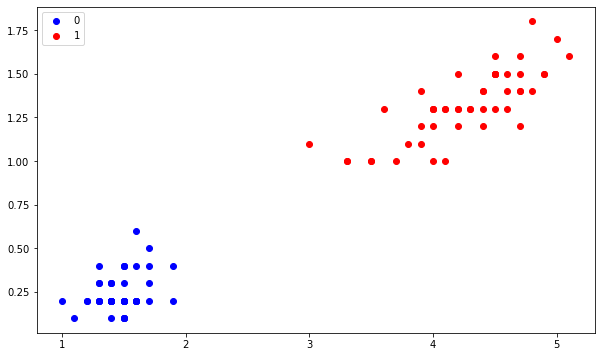

(100, 3)


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.core.defchararray as np_f

X = np.genfromtxt('Data/small_iris.csv', dtype = float, delimiter = ',', usecols = [2,3], skip_header = 1)
Y = np.genfromtxt('Data/small_iris.csv', dtype = str, delimiter = ',', usecols=[4], skip_header = 1)

print(Y[0:2])
#thay thế chuỗi bằng số
categories = np.unique(Y)
print(categories)
for i in range(categories.size):
    Y = np_f.replace(Y, categories[i], str(i)) #Thay thế từng thằng trong Y mà có trong categories bằng str(i)
Y = Y.astype(float)
print(Y.shape)

plt.figure(figsize = (10,6))
plt.scatter(X[Y==0][:,0], X[Y==0][:, 1], color = 'b', label = '0')
plt.scatter(X[Y==1][:,0], X[Y==1][:,1], color = 'r', label = '1')
plt.legend()
plt.show()
intercept = np.ones((X.shape[0],1))
X = np.concatenate((intercept, X), axis = 1)
print(X.shape)

## CODE huấn luyện mô hinh logistic regression

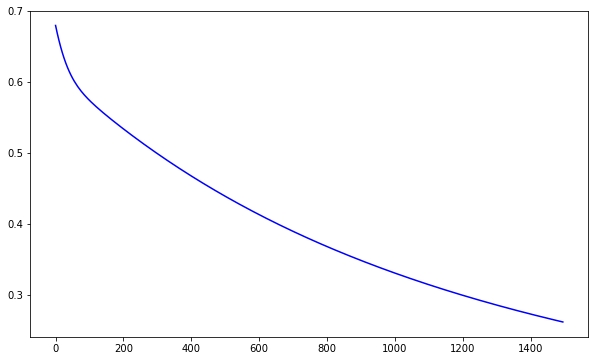

In [54]:
def sigmoid_function(z):
    return 1/(1 + np.exp(-z))
def loss_function(y, h):
    return (-y*np.log(h) - (1-y)*np.log(1-h)).mean()
def predict(X, thetas):
    h = sigmoid_function(np.dot(X, thetas))
    return h.round()

lr = 0.01
iterater = 1500
theta = np.random.randn(X.shape[1]) # (3,)
losses = []
accs = []
sigmoids = []
for i in range(iterater):
    z = np.dot(X, theta) #(100,3)x(3,) = (100,)
    h = sigmoid_function(z) #(100,)
    loss = loss_function(Y, h)
    
    gradient = np.dot(X.T, (h-Y))/Y.size # (3,10)x(10,) = (3,)
    theta -= lr*gradient
    if (i % 5 == 0):
        losses.append(loss)
        preds = predict(X, theta)
        acc = (preds == Y).mean()
        accs.append(acc)
        sigmoids.append(h.mean())
# vẽ
a = np.array(range(len(losses)))
plt.figure(figsize = (10,6))
plt.plot(a*5, losses, color = 'b')
plt.show()

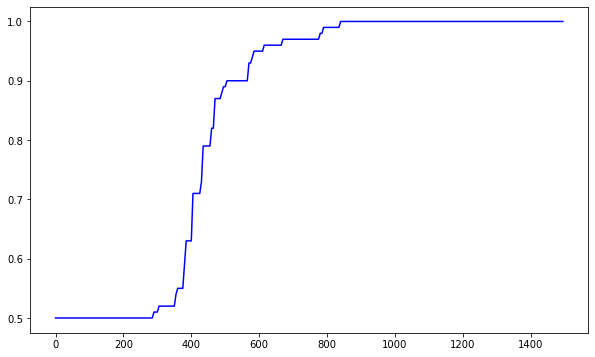

In [55]:
plt.figure(figsize = (10,6))
plt.plot(a*5, accs, color = 'b')
plt.show()

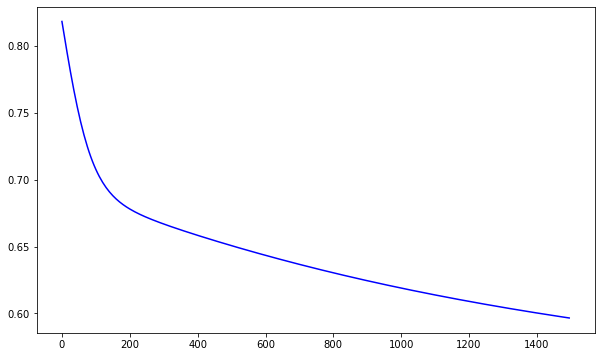

In [56]:
plt.figure(figsize = (10,6))
plt.plot(a*5, sigmoids, color = 'b')
plt.show()

In [65]:
arr = [0.1,0.2,0.3,0.4,5,6,7,8,9,10,11,12]
arr = np.array(arr)
arr = arr.reshape(4,3)
print(arr)
print('--'*10)
print(arr[range(4),0])

[[ 0.1  0.2  0.3]
 [ 0.4  5.   6. ]
 [ 7.   8.   9. ]
 [10.  11.  12. ]]
--------------------
[ 0.1  0.4  7.  10. ]
